## To do for June 7th:

Overall objective is to understand what factors affect soil thawing. We will apply exploratory data analysis (i.e. plotting data creatively). Tasks:

Andrew - create a function to plot zero degree isotherms

Ines - create a function that plots the time from start to end of thaw for different years

Seth - create a plot of snow depth vs time, for the thaw period

Sujan - create a plot of water table depth, for the thaw period

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import saveload as sl
import pandas as pd
from datetime import datetime, timedelta 

In [2]:
def GetThawDate(ts,year):
    """
       - objective : 
       
       Take a temperature for a year with temperature greater than or equal to 0 and  indexed in order
       
       
       -Parameters: 
       The parameter that is used here are the year (year) of the time series data and the time series (ts) of

       -Returns:
        thawdate(yyyy:mm:dd  hr:mm:ss) is in the form of the year that is returned
   """
    AnnualTemp=ts[str(year)]
    Thawed=AnnualTemp[AnnualTemp>=0]
    thawdate=Thawed.index[0]
    return thawdate

In [3]:
def TemFun(df,year,depth,delay=30):
    """
        -Objective: 
        Plot for temperature vs time. This plot uses a time window based 
        On the end and start date. The dates end and start use the thawdate date. The thawdate date represents the time
        in which the thawing process starts
        -Parameters:
        df: Dataframe with the WISKI data information
        year: year for which do you want to create the plot
        depth: in centimetres. Depth for the measurements. Pick from: 002, 005, 010, 020, 050, 100
        delay: (=30) in days. Time to delay to catch the thawing beginnign delay with the depth

        -Returns:
        A plot in format .png from the temperature vs time. One single line for the specified year.
        """
    column='SoilTemp_'+depth+'cmNW'
    thawdate=GetThawDate(df[column],year)
    end=thawdate+timedelta(days = delay) 
    start=thawdate+timedelta(days = -7)
    Temp=df[start:end]
    plt.plot(Temp[column],label='')
    plt.xlabel("Time (days)")    
    plt.ylabel("Depth (meter)")

In [277]:
def VolFun(vol,df):
    """
       - objective : 
       
       To obtain a plot of temperature verses volumetric moisture content.
       
       
       -Parameters: 
       The function takes the temperature and volumetric moisture content data.

       -Returns:
        plots of Temperature verses voolumetric moisture content
   """
    
    volcol='SoilVWC_00to15cmNW'                                          # specifies the column values to use
    Tempcol='SoilTemp_010cmNW'
    start='2011-08-01'                                                   # specifies the starte time
    end='2012-10-10'                                                     # specifies the end time
    Temp=df[start:end] 
    Temp=Temp[Tempcol].resample('D').mean()                              # produce a daily mean for the data
    VWC=vol[start:end]
    VWC=VWC[volcol].resample("D").mean()
    if len(VWC)!=len(Temp): print('ERROR - lengths are different')       # returns an error if the time steps are different
    i=np.where(Temp.values<=0)                                           # tracking values corresponding to only negative values
    j=np.where(Temp.values>=0)                                           # tracking values corresponding to only negative values
    
    plt.figure(figsize=(12,12))                                          # making sub-plots
    plt.subplot(2,2,1)
    plt.plot(Temp.values[j],VWC.values[j], ".")
    plt.plot(Temp.values[i],VWC.values[i],'.', color="red")
    plt.xlabel("Temperature (degrees C)")
    plt.ylabel("Volumetric moisture content (m^3/m^3)")
    plt.title("Temperature against Volumetric moisture content")

    
    plt.subplot(2,2,2)
    plt.plot(Temp.values[i],VWC.values[i],'.', color="red")
    plt.xlabel("Temperature (degrees C)")
    plt.ylabel("Volumetric moisture content (m^3/m^3)")
    plt.title("Volumetric moisture content in sub-zero temperatures")
    
    plt.subplot(2,2,3)
    plt.plot(Temp.values[j],VWC.values[j], ".")
    plt.xlabel("Temperature (degrees C)")
    plt.ylabel("Volumetric moisture content (m^3/$m^3)")
    plt.title("Volumetric moisture content in positive temperatures")

In [282]:
# Load dataframe of Temperature at different depths:
df=sl.load('../../data/OJP/OJP_NW_T.pkl')
vol=sl.load('../../data/OJP/OJP_NW_VWC.pkl')

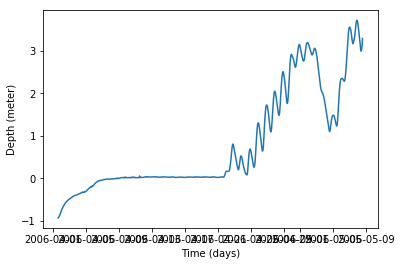

In [279]:
# Set the depth: 002 005 010 020 050 100
TemFun(df,2006,'020')

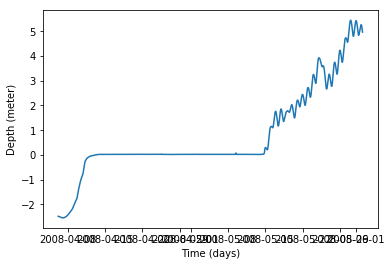

In [280]:
TemFun(df,2008,'020',delay=50)

/Users/ska091/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/Users/ska091/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


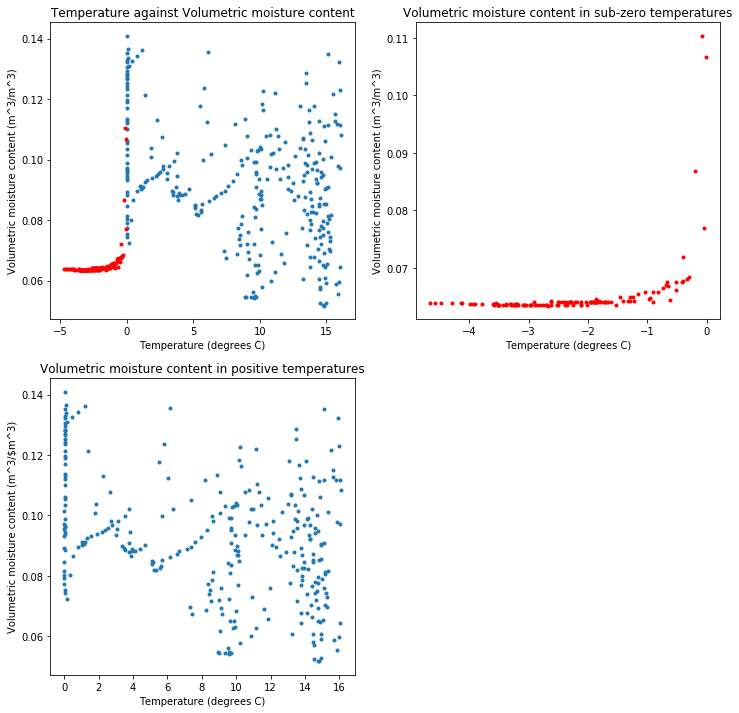

In [281]:
# Calling Function
VolFun(vol,df)